In [ ]:
# Following the tutorials in the IBM website

# Qiskit pattern:
# 1. Map the problem to crcuits and operators
# 2. Optimize the circuit
# 3. Excetute the circuit on a quantum computer (backend)
# 4. Post-process the results

# Hello World example on a 2 qubit Bell state
 Step 1: Map the problem to crcuits and operators

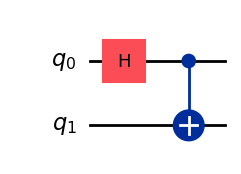

In [3]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2) # Create a quantum circuit with 2 qubits

qc.h(0) # Apply a Hadamard gate on qubit 0
qc.cx(0,1) # Apply a CNOT gate on control qubit 0 and target qubit 1. aka if the control qubit is 1, then apply X gate on the target qubit

qc.draw(output='mpl') # Draw the circuit. output='mpl' is to draw the circuit using matplotlib


In [5]:
from qiskit.quantum_info import Pauli

ZZ = Pauli('ZZ') # Create a Pauli object with label ZZ
ZI = Pauli('ZI')
IZ = Pauli('IZ')
XX = Pauli('XX')
XI = Pauli('XI')
IX = Pauli('IX')

operators_lst = [ZZ, ZI, IZ, XX, XI, IX]

# Step 3: Execute the circuit on backend (we sktp step 2 for now)

In [8]:
from qiskit_aer.primitives import Estimator

estimator = Estimator() # Create an Estimator object. This object is used to estimate the expectation value of a given operator
job = estimator.run([qc] * len(operators_lst), observables=operators_lst) # Run the estimator object with the quantum circuit and the operators list

print(job.result()) # Print the result of the job

EstimatorResult(values=array([ 1.        ,  0.00390625,  0.00390625,  1.        , -0.0078125 ,
       -0.0078125 ]), metadata=[{'shots': 1024, 'variance': 0.0, 'simulator_metadata': [{'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.0083894, 'sample_measure_time': 0.0015154, 'input_qubit_map': [[0, 0], [1, 1]], 'max_memory_mb': 23271, 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 12, 'runtime_parameter_bind': False, 'num_bind_params': 1, 'fusion': {'enabled': False}}]}, {'shots': 1024, 'variance': 0.9999847412109375, 'simulator_metadata': [{'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.0083894, 'sample_measure_time': 0.0015

# Step 4: Post processing and plotting

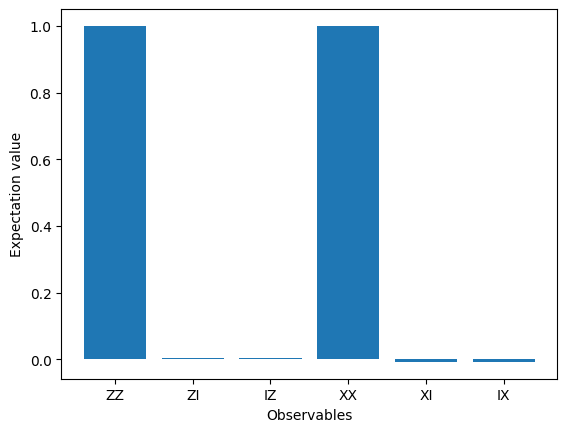

Operator([[ 1.+0.j,  0.+0.j],
          [ 0.+0.j, -1.+0.j]],
         input_dims=(2,), output_dims=(2,))
Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))


In [10]:
import matplotlib.pyplot as plt

labels = [str(op) for op in operators_lst] # Create a list of labels for the operators
values = job.result().values # Get the values from the result of the job

plt.bar(labels, values) # Create a bar plot with the labels and values
plt.xlabel('Observables') # Set the x-axis label
plt.ylabel('Expectation value') # Set the y-axis label
plt.show() # Show the plot

# Print Z gate and X gate
from qiskit.quantum_info import Operator

Z = Operator.from_label('Z') # Create a Z gate
X = Operator.from_label('X') # Create an X gate

print(Z) # Print the Z gate
print(X) # Print the X gate

[0, 1, 1, 0]